Importamos las librerías


In [25]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
 



Creamos el dataset

In [17]:
df_bosque = pd.read_csv('covtype.data')
data = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']

soil_type = ['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
                      'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
                      'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15',
                      'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
                      'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25',
                      'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
                      'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35',
                      'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']
wilderness_area = ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']

for i in range(1, 5):
    col_nombre = f'Wilderness_Area{i}'
    data.append(col_nombre)
    wilderness_area.append(col_nombre)

for i in range(1, 41):
    col_nombre = f'Soil_Type{i}'
    data.append(col_nombre)
    soil_type.append(col_nombre)

data.append('Cover_Type')
df_bosque.columns = data

df_bosque



,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
1,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
2,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
3,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
4,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581006,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581007,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581008,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581009,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


Juntamos las columnas del suelo y áreas silvestres. Y, a continuación, borramos las columnas que no nos interesan.

In [18]:
# Juntamos las columnas de Wilderness_Area y Soil_Type en una sola columna

df_bosque['Soil_Type'] = df_bosque[soil_type].sum(axis=1)
df_bosque['Wilderness_Area'] = df_bosque[wilderness_area].sum(axis=1)

# Eliminamos las columnas que ya no necesitamos

df_bosque = df_bosque.drop(columns=soil_type)
df_bosque = df_bosque.drop(columns=wilderness_area)

df_bosque

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Soil_Type,Wilderness_Area
0,2590,56,2,212,-6,390,220,235,151,6225,5,2,2
1,2804,139,9,268,65,3180,234,238,135,6121,2,2,2
2,2785,155,18,242,118,3090,238,238,122,6211,2,2,2
3,2595,45,2,153,-1,391,220,234,150,6172,5,2,2
4,2579,132,6,300,-15,67,230,237,140,6031,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
581006,2396,153,20,85,17,108,240,237,118,837,3,2,2
581007,2391,152,19,67,12,95,240,237,119,845,3,2,2
581008,2386,159,17,60,7,90,236,241,130,854,3,2,2
581009,2384,170,15,60,5,90,230,245,143,864,3,2,2


Ejercicio 1

Para conseguir un dataset con una dimensión reducidad, aplica la técnica de Selección de variables basada en árbol de decisión mediante las importancias de cada variable (Decision Trees Importances):

- Filtra el tablón para quedarnos solamente con las variables que aglutinan hasta el 95% de la información que se requiere para estimar la variable objetivo.

- random_state=100

In [19]:
d_arbol = ExtraTreesClassifier(random_state=100)

X = df_bosque.drop(['Cover_Type'], axis=1)
y = df_bosque['Cover_Type']

# Entrenamos el clasificador para poder realizar predicciones más precisas

d_arbol.fit(X, y)

# Calculamos la importancia, lo que puede ayudarnos a seleccionar las características más importantes y eliminar las menos importantes.

importancia = d_arbol.feature_importances_

# Ordenamos los índices de manera descendente, para que los valores más importantes estén en la parte superior.

indices = np.argsort(importancia)[::-1]

# Realizamos la suma acumulativa de las importancias ordenadas de manera descendente para luego, aplicarles el 95% de la suma total.

importancia_acumulada = np.cumsum(importancia[indices])

# Seleccionamos las características que representan hasta el 95% de la importancia acumulada.

indices_pedidos = indices[importancia_acumulada <= 0.95]

# Filtramos el DataFrame original con las características seleccionadas.

df_reducir = df_bosque.iloc[:, indices_pedidos].copy()

# Volvemos a añadir la columna Cover_Type al DataFrame.

df_reducir['Cover_Type'] = df_bosque['Cover_Type'].copy()

df_reducir


,Elevation,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Aspect,Hillshade_Noon,Hillshade_9am,Cover_Type
0,2590,390,6225,212,-6,56,235,220,5
1,2804,3180,6121,268,65,139,238,234,2
2,2785,3090,6211,242,118,155,238,238,2
3,2595,391,6172,153,-1,45,234,220,5
4,2579,67,6031,300,-15,132,237,230,2
...,...,...,...,...,...,...,...,...,...
581006,2396,108,837,85,17,153,237,240,3
581007,2391,95,845,67,12,152,237,240,3
581008,2386,90,854,60,7,159,241,236,3
581009,2384,90,864,60,5,170,245,230,3


Ejercicio 2

Después de filtrar el dataset vamos a plantear un problema de clasificación para conseguir un clasificador de la cubierta forestal en basea a las variables cartográficas.:

2.1 Genera una gráfica para visualizar la distribución de las variables del datset en conjunto. Analiza dicha gráfica y explica si hay una necesidad de normalizar los datos.

2.2 Normaliza todas las variables del dataset a una escala estándar. Para ello puedes realizar estas transformaciones:

LLevar las variables de entrada a una escala de 0 a 1
Convertir la variable objetivo en valores numéricos entre 0 y el número de clases menos 1

2.1) Genera una gráfica para visualizar la distribución de las variables del datset en conjunto. Analiza dicha gráfica y explica si hay una necesidad de normalizar los datos.

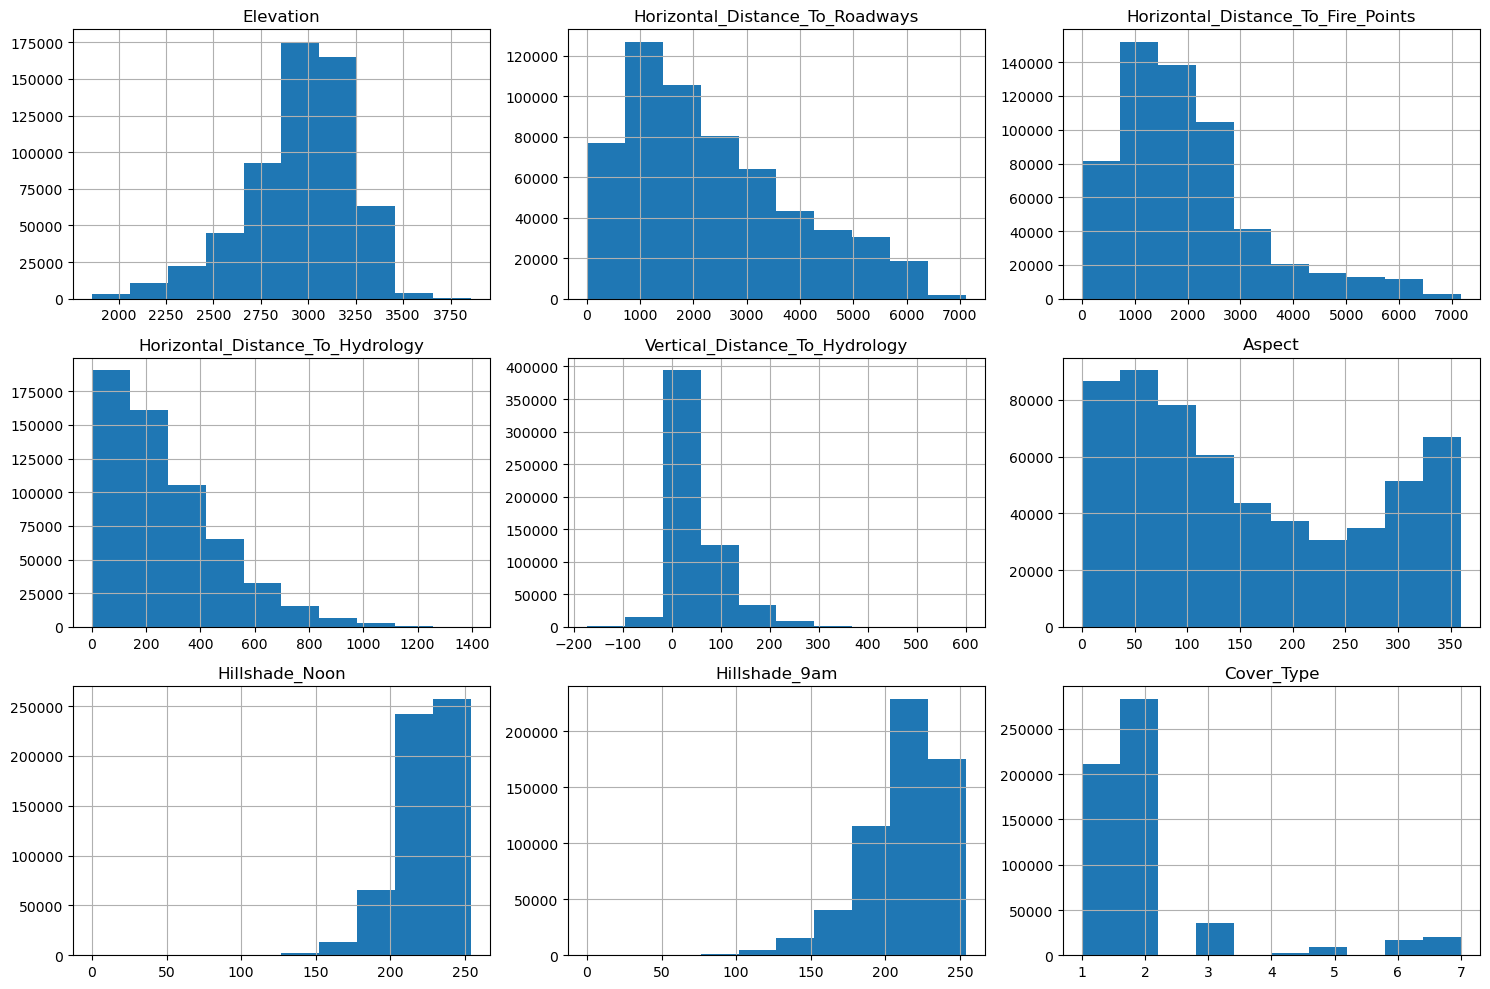

,Elevation,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Aspect,Hillshade_Noon,Hillshade_9am,Cover_Type
0,2590,390,6225,212,-6,56,235,220,5
1,2804,3180,6121,268,65,139,238,234,2
2,2785,3090,6211,242,118,155,238,238,2
3,2595,391,6172,153,-1,45,234,220,5
4,2579,67,6031,300,-15,132,237,230,2
...,...,...,...,...,...,...,...,...,...
581006,2396,108,837,85,17,153,237,240,3
581007,2391,95,845,67,12,152,237,240,3
581008,2386,90,854,60,7,159,241,236,3
581009,2384,90,864,60,5,170,245,230,3


In [22]:

df_reducir_2= df_reducir.copy()

# Generamos un histograma

df_reducir_2.hist(figsize=(15, 10))

# Diselo del histograma y lo mostramos

plt.tight_layout()
plt.show()



df_reducir_2


2.2) Normaliza todas las variables del dataset a una escala estándar. Para ello puedes realizar estas transformaciones:

LLevar las variables de entrada a una escala de 0 a 1
Convertir la variable objetivo en valores numéricos entre 0 y el número de clases menos 1

In [23]:
# Ajustamos las variables para que estén en una escala precisa

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_reducir_2.drop(['Cover_Type'], axis=1))

# Asignamos un valor númerico diferente a cada categoría

label = LabelEncoder()
y_label = label.fit_transform(df_reducir_2['Cover_Type'])

# Verificamnos el mínimo y el máximo de cada columna

df_reducir_2.describe()


,Elevation,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Aspect,Hillshade_Noon,Hillshade_9am,Cover_Type
count,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000
mean,2959.365926,2350.149779,1980.283828,269.428236,46.418935,155.656988,223.318701,212.146033,2.051465
std,279.984569,1559.254343,1324.184340,212.549538,58.295250,111.913733,19.768711,26.769909,1.396500
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,1106.000000,1024.000000,108.000000,7.000000,58.000000,213.000000,198.000000,1.000000
50%,2996.000000,1997.000000,1710.000000,218.000000,30.000000,127.000000,226.000000,218.000000,2.000000
75%,3163.000000,3328.000000,2550.000000,384.000000,69.000000,260.000000,237.000000,231.000000,2.000000
max,3858.000000,7117.000000,7173.000000,1397.000000,601.000000,360.000000,254.000000,254.000000,7.000000


Ejercicio 3

Después de estandarizar los datos procedemos a crear el primer clasificador:

3.1 Divide el datset en training y en test:

Guarda el 20% de los datos para testeo.

random_state=100

3.2 Entrena un modelo de regresión logística:

Número máximo de iteraciones igual a 1000

random_state=100

3.3 Calcula diferentes métricas para evaluar este modelo y analiza su rendimiendo.

Accuracy

F1-score (average='weighted')

Classification report (zero_division=0)

Confusion matrix

3.1) Divide el datset en training y en test:

Guarda el 20% de los datos para testeo.

random_state=100

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_label, test_size=0.2, random_state=100)


3.2) Entrena un modelo de regresión logística:

Número máximo de iteraciones igual a 1000

random_state=100

In [29]:
modelo_regresion = LogisticRegression(random_state=100, max_iter=1000)
modelo_regresion.fit(X_train, y_train)

# Realizamos predicciones 

y_pred = modelo_regresion.predict(X_test)

3.3) Calcula diferentes métricas para evaluar este modelo y analiza su rendimiendo.

Accuracy

F1-score (average='weighted')

Classification report (zero_division=0)

Confusion matrix

In [31]:
accuracy = round(accuracy_score(y_test, y_pred),2)
f1 = round(f1_score(y_test, y_pred, average='weighted'),2)
classification = classification_report(y_test, y_pred, zero_division=0)
confusion = confusion_matrix(y_test, y_pred)

# Imprimimos accuracy, f1, classification y confusion

print(f'Accuracy: {accuracy}')


Accuracy: 0.69


In [32]:
print(f'F1 Score: {f1}')

F1 Score: 0.67


In [33]:
print(f'Classification Report: \n{classification}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.67      0.69      0.68     42680
           1       0.72      0.79      0.75     56417
           2       0.58      0.69      0.63      7136
           3       0.54      0.08      0.14       578
           4       0.00      0.00      0.00      1873
           5       0.30      0.07      0.11      3400
           6       0.57      0.22      0.32      4119

    accuracy                           0.69    116203
   macro avg       0.49      0.36      0.38    116203
weighted avg       0.67      0.69      0.67    116203



In [34]:
print(f'Confusion Matrix: \n{confusion}')

Confusion Matrix: 
[[29595 12416     1     0     0     0   668]
 [11153 44333   846     0     0    73    12]
 [    0  1727  4903    38     0   468     0]
 [    0     3   523    45     0     7     0]
 [    5  1866     2     0     0     0     0]
 [    0  1049  2112     0     0   239     0]
 [ 3138    67     0     0     0     0   914]]


In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=label.classes_)

disp.plot()
plt.show()